In [15]:
#import the modules
import os
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from prettytable import PrettyTable
import imageio as io
import matplotlib.pyplot as plt

In [4]:
#read the path
file_path = "/home/devidaskushnure/Documents/Devidas_Docs/task/MultiOFF_Dataset/Split Dataset/"
#list all the files from the directory
csv_files = os.listdir(file_path)
csv_files
# pd.read_csv(file_path+csv_files[0])

['Training_meme_dataset.csv',
 'Validation_meme_dataset.csv',
 'Testing_meme_dataset.csv']

In [5]:
df_concat = pd.concat([pd.read_csv(file_path+f) for f in csv_files ], ignore_index=True)
df_concat.to_csv("combined_data.csv")

In [44]:
len(df_concat)

743

In [3]:
# get the image path or directory 
folder_dir = "/home/devidaskushnure/Documents/Devidas_Docs/task/MultiOFF_Dataset/Labelled Images/"
img_labels=[]
img_shape=[]
for images in os.listdir(folder_dir): 
    # check if the image ends with png or jpg or jpeg
    if (images.endswith(".png") or images.endswith(".jpg")):
        img_labels.append(images)
       
    
        
actual_img_df = pd.DataFrame(img_labels, columns=["actual_labels"])

actual_img_df.to_csv("actual_images_labels.csv",index=False)

print(len(img_labels))


743


In [20]:
# get the image path or directory 
folder_dir = "/home/devidaskushnure/Documents/Devidas_Docs/task/MultiOFF_Dataset/Labelled Images/"
img_shape=[]
for images in os.listdir(folder_dir): 
    # check if the image ends with png or jpg or jpeg
    img = io.imread(folder_dir+images)        
    img_shape.append(img.shape)
       
    
        
img_dim = pd.DataFrame(img_shape, columns=["image_dim_X","image_dim_Y","image_dim_Z"])

img_dim.to_csv("Image_Dimension.csv",index=False)

print(len(img_shape))


743


In [19]:
img_shape

[(608, 763, 4),
 (1200, 900, 3),
 (526, 499, 3),
 (480, 480, 3),
 (1136, 962, 3),
 (718, 960, 3),
 (720, 720, 3),
 (347, 499, 3),
 (3117, 2282, 3),
 (500, 793, 3),
 (588, 548, 4),
 (356, 400, 3),
 (640, 600, 3),
 (485, 605, 4),
 (378, 381, 3),
 (454, 539, 3),
 (583, 583, 3),
 (808, 677, 3),
 (446, 480, 3),
 (918, 883, 3),
 (637, 640, 3),
 (843, 844, 3),
 (960, 640, 3),
 (981, 1440, 3),
 (1627, 770, 4),
 (313, 557, 3),
 (959, 663, 3),
 (480, 480, 3),
 (1200, 731, 3),
 (640, 432, 3),
 (960, 784, 3),
 (648, 600, 3),
 (750, 750, 4),
 (389, 599, 3),
 (601, 600, 3),
 (550, 550, 3),
 (413, 469, 3),
 (458, 565, 3),
 (551, 526, 3),
 (1215, 1080, 4),
 (960, 960, 3),
 (466, 940, 4),
 (1334, 750, 3),
 (220, 500, 3),
 (1102, 894, 4),
 (1280, 720, 3),
 (2099, 1181, 3),
 (600, 400, 4),
 (95, 857, 3),
 (411, 667, 3),
 (549, 960, 3),
 (1434, 1434, 4),
 (4240, 2387, 3),
 (529, 617, 3),
 (397, 604, 4),
 (300, 600, 3),
 (600, 555, 3),
 (545, 750, 3),
 (528, 600, 3),
 (480, 480, 3),
 (838, 750, 3),
 (358, 

In [8]:
c_result = actual_img_df[~actual_img_df["actual_labels"].isin(df_concat["image_name"])]
print(c_result)
print("length=",len(c_result))
c_result.to_csv("extra_images.csv")

    actual_labels
47    hOxu3fK.png
204   QLgpXMT.png
231     D1xG5.png
370   7wKCNn2.png
474   mpA6ezG.png
484   6eRZSgn.png
length= 6


In [14]:
# delete/remove the extra images
extra_img= c_result["actual_labels"].to_list()
for i in extra_img:
    os.remove(folder_dir+i)

In [19]:
print(csv_files)
train_df=pd.read_csv(file_path+csv_files[0])
val_df=pd.read_csv(file_path+csv_files[1])
test_df=pd.read_csv(file_path+csv_files[2])
print(train_df.columns)
print(val_df.columns)
print(test_df.columns)


['Training_meme_dataset.csv', 'Validation_meme_dataset.csv', 'Testing_meme_dataset.csv']
Index(['image_name', 'sentence', 'label'], dtype='object')
Index(['image_name', 'sentence', 'label'], dtype='object')
Index(['image_name', 'sentence', 'label'], dtype='object')


Train_offensive = 187   Train_Non-offensive = 258


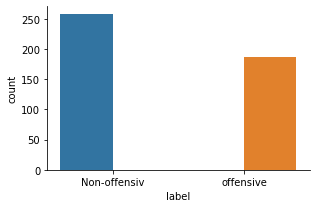

In [57]:
#training data analysis
train_offensive= train_df['label'].value_counts()["offensive"]
train_nonoffensive= train_df['label'].value_counts()["Non-offensiv"]
print("Train_offensive = {}   Train_Non-offensive = {}".format(train_offensive,train_nonoffensive))
sns.catplot(kind='count', data=train_df, x='label', hue='label', height=3, aspect=1.5)
plt.show()

Val_offensive = 58   Val_Non-offensive = 91


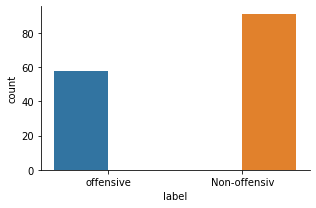

In [52]:
# validation data analysis
val_offensive= val_df['label'].value_counts()["offensive"]
val_nonoffensive= val_df['label'].value_counts()["Non-offensiv"]
print("Val_offensive = {}   Val_Non-offensive = {}".format(val_offensive,val_nonoffensive))
sns.catplot(kind='count', data=val_df, x='label', hue='label', height=3, aspect=1.5)
plt.show()

Test_offensive = 58   Test_Non-offensive = 91


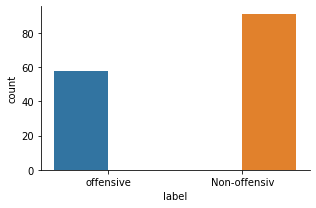

In [53]:
# Test data analysis
test_offensive= test_df['label'].value_counts()["offensive"]
test_nonoffensive= test_df['label'].value_counts()["Non-offensiv"]
print("Test_offensive = {}   Test_Non-offensive = {}".format(test_offensive,test_nonoffensive))
sns.catplot(kind='count', data=test_df, x='label', hue='label', height=3, aspect=1.5)
plt.show()

In [58]:
# Specify the Column Names while initializing the Table
analysis_table = PrettyTable(["Data_analysis", "Training", "Validation", "Testing"])
 
# Add rows
analysis_table.add_row(["Offensive", train_offensive, val_offensive, test_offensive])
analysis_table.add_row(["Non-offensive", train_nonoffensive, val_nonoffensive, test_nonoffensive])
analysis_table.add_row(["Total", (train_offensive+train_nonoffensive),(val_offensive+val_nonoffensive), (test_offensive+test_nonoffensive) ])

print(analysis_table)

+---------------+----------+------------+---------+
| Data_analysis | Training | Validation | Testing |
+---------------+----------+------------+---------+
|   Offensive   |   187    |     58     |    58   |
| Non-offensive |   258    |     91     |    91   |
|     Total     |   445    |    149     |   149   |
+---------------+----------+------------+---------+
